In [2]:
import os
import pandas as pd
import numpy as np
import pprint as pp
import datetime as dt
import pathlib
import re
import json
import math

In [3]:
symbols_list_file_name = "binance_BTC_from_2019_05_01_to_2022_04_30.json"
with open(symbols_list_file_name, "r") as f:
    symbols_list = json.load(f)
    
returns_folder_name = "returns"

In [4]:
symbol = 'ethbtc'
save_file_name = symbol + '.csv.gz'
save_path = os.path.join(os.getcwd(), returns_folder_name, save_file_name)
df = pd.read_csv(save_path, compression='gzip')

In [5]:
ts_list = []

In [6]:
for symbol in symbols_list:
    save_file_name = symbol + '.csv.gz'
    save_path = os.path.join(os.getcwd(), returns_folder_name, save_file_name)
    df = pd.read_csv(save_path, compression='gzip')
    ts_list.append(df['log_return'].rename(symbol))
all_returns_df = pd.concat(ts_list, axis=1)

In [8]:
all_returns_df

,bnbbtc,adabtc,ethbtc,batbtc,btcusdc,btcusdt,neobtc,btctusd,etcbtc,ltcbtc,...,xmrbtc,zecbtc,qtumbtc,dcrbtc,xlmbtc,iotabtc,manabtc,dashbtc,zrxbtc,repbtc
0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.000194,-0.000634,-0.000765,0.0,-0.000580,-0.000206,0.0,0.0,-0.001066,0.000000,...,-0.000347,0.000944,0.0,0.000000,0.000000,0.000000,0.000748,0.000196,0.000000,0.000000
2,-0.000486,-0.000634,-0.000343,0.0,-0.000088,-0.000012,0.0,0.0,0.000000,-0.000929,...,-0.002173,-0.003374,0.0,0.000000,0.000000,0.000000,-0.000187,0.000196,-0.000542,0.000000
3,-0.000049,-0.000423,0.000079,0.0,-0.000112,-0.000163,0.0,0.0,-0.000533,0.000186,...,-0.000174,0.000135,0.0,0.001089,0.000000,0.000000,-0.000187,0.000000,0.000000,0.000000
4,0.000340,0.000000,0.000330,0.0,0.001232,0.001171,0.0,0.0,0.000000,-0.000186,...,0.000348,-0.001082,0.0,-0.000363,0.000000,0.000000,-0.000374,0.000000,-0.002712,0.000441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21595,0.000098,0.000000,-0.000230,0.0,0.000316,0.000149,0.0,0.0,-0.000639,-0.000193,...,-0.000526,0.000813,0.0,0.000000,0.000000,0.000000,-0.000220,0.000000,0.000243,0.000000
21596,0.000098,0.000236,0.000650,0.0,0.000085,0.000226,0.0,0.0,0.000000,0.001155,...,0.000438,0.000542,0.0,0.000000,0.000000,0.000000,0.000220,0.000000,0.000000,0.000000
21597,0.000293,0.000236,0.000419,0.0,0.000259,0.000190,0.0,0.0,0.000000,-0.000577,...,0.000175,0.000271,0.0,0.000000,0.000000,0.000323,0.000000,0.000000,0.000000,0.000000
21598,0.000488,0.000000,-0.000230,0.0,-0.000474,-0.000512,0.0,0.0,0.000000,0.000192,...,0.000438,0.000135,0.0,0.000000,0.002141,0.001292,0.000110,0.000000,0.000000,0.000000


In [9]:
all_returns_df.corr()

,bnbbtc,adabtc,ethbtc,batbtc,btcusdc,btcusdt,neobtc,btctusd,etcbtc,ltcbtc,...,xmrbtc,zecbtc,qtumbtc,dcrbtc,xlmbtc,iotabtc,manabtc,dashbtc,zrxbtc,repbtc
bnbbtc,1.000000,0.216906,0.317748,0.087149,-0.394277,-0.375829,0.100580,-0.251663,0.094011,0.223797,...,0.117983,0.091860,0.070974,0.040773,0.156087,0.137774,0.205502,0.129870,0.031097,0.033094
adabtc,0.216906,1.000000,0.202276,0.092983,0.029113,0.028297,0.125405,-0.032398,0.190691,0.211864,...,0.114556,0.169135,0.091167,-0.002463,0.125173,0.161501,0.272582,0.172700,0.051799,0.008242
ethbtc,0.317748,0.202276,1.000000,0.063614,-0.070212,-0.058467,0.075426,-0.118786,0.139914,0.199471,...,0.114562,0.103156,0.070843,0.018564,0.103814,0.086518,0.208183,0.120854,0.039109,0.016052
batbtc,0.087149,0.092983,0.063614,1.000000,0.004008,0.006496,0.104488,-0.015302,0.103548,0.083219,...,0.046615,0.093659,0.094128,0.004525,0.076619,0.132909,0.159837,0.109385,0.036243,-0.004224
btcusdc,-0.394277,0.029113,-0.070212,0.004008,1.000000,0.946209,0.015134,0.368109,0.117012,-0.068487,...,0.003349,0.072342,0.033487,-0.045487,-0.063518,0.041676,0.110632,0.062996,0.019110,-0.054094
btcusdt,-0.375829,0.028297,-0.058467,0.006496,0.946209,1.000000,0.006670,0.342403,0.105970,-0.061870,...,0.006243,0.072943,0.027637,-0.042234,-0.057959,0.033108,0.105916,0.059971,0.020546,-0.051269
neobtc,0.100580,0.125405,0.075426,0.104488,0.015134,0.006670,1.000000,-0.017021,0.150637,0.122548,...,0.045902,0.106063,0.151269,0.014296,0.080192,0.178031,0.150712,0.165935,0.034220,-0.005676
btctusd,-0.251663,-0.032398,-0.118786,-0.015302,0.368109,0.342403,-0.017021,1.000000,0.033610,-0.048322,...,-0.018837,0.021077,0.022187,-0.028665,-0.096784,-0.012370,0.010831,-0.009601,0.002895,-0.034861
etcbtc,0.094011,0.190691,0.139914,0.103548,0.117012,0.105970,0.150637,0.033610,1.000000,0.155412,...,0.071473,0.145330,0.119506,0.003113,0.110741,0.176279,0.224525,0.180733,0.035746,0.008752
ltcbtc,0.223797,0.211864,0.199471,0.083219,-0.068487,-0.061870,0.122548,-0.048322,0.155412,1.000000,...,0.098596,0.132293,0.082210,0.009018,0.118290,0.141773,0.200701,0.168069,0.032189,0.013890


In [13]:
returns_corr = all_returns_df.corr().abs()

In [63]:
all_returns_df.corr()

,bnbbtc,adabtc,ethbtc,batbtc,btcusdc,btcusdt,neobtc,btctusd,etcbtc,ltcbtc,...,xmrbtc,zecbtc,qtumbtc,dcrbtc,xlmbtc,iotabtc,manabtc,dashbtc,zrxbtc,repbtc
bnbbtc,1.000000,0.216906,0.317748,0.087149,-0.394277,-0.375829,0.100580,-0.251663,0.094011,0.223797,...,0.117983,0.091860,0.070974,0.040773,0.156087,0.137774,0.205502,0.129870,0.031097,0.033094
adabtc,0.216906,1.000000,0.202276,0.092983,0.029113,0.028297,0.125405,-0.032398,0.190691,0.211864,...,0.114556,0.169135,0.091167,-0.002463,0.125173,0.161501,0.272582,0.172700,0.051799,0.008242
ethbtc,0.317748,0.202276,1.000000,0.063614,-0.070212,-0.058467,0.075426,-0.118786,0.139914,0.199471,...,0.114562,0.103156,0.070843,0.018564,0.103814,0.086518,0.208183,0.120854,0.039109,0.016052
batbtc,0.087149,0.092983,0.063614,1.000000,0.004008,0.006496,0.104488,-0.015302,0.103548,0.083219,...,0.046615,0.093659,0.094128,0.004525,0.076619,0.132909,0.159837,0.109385,0.036243,-0.004224
btcusdc,-0.394277,0.029113,-0.070212,0.004008,1.000000,0.946209,0.015134,0.368109,0.117012,-0.068487,...,0.003349,0.072342,0.033487,-0.045487,-0.063518,0.041676,0.110632,0.062996,0.019110,-0.054094
btcusdt,-0.375829,0.028297,-0.058467,0.006496,0.946209,1.000000,0.006670,0.342403,0.105970,-0.061870,...,0.006243,0.072943,0.027637,-0.042234,-0.057959,0.033108,0.105916,0.059971,0.020546,-0.051269
neobtc,0.100580,0.125405,0.075426,0.104488,0.015134,0.006670,1.000000,-0.017021,0.150637,0.122548,...,0.045902,0.106063,0.151269,0.014296,0.080192,0.178031,0.150712,0.165935,0.034220,-0.005676
btctusd,-0.251663,-0.032398,-0.118786,-0.015302,0.368109,0.342403,-0.017021,1.000000,0.033610,-0.048322,...,-0.018837,0.021077,0.022187,-0.028665,-0.096784,-0.012370,0.010831,-0.009601,0.002895,-0.034861
etcbtc,0.094011,0.190691,0.139914,0.103548,0.117012,0.105970,0.150637,0.033610,1.000000,0.155412,...,0.071473,0.145330,0.119506,0.003113,0.110741,0.176279,0.224525,0.180733,0.035746,0.008752
ltcbtc,0.223797,0.211864,0.199471,0.083219,-0.068487,-0.061870,0.122548,-0.048322,0.155412,1.000000,...,0.098596,0.132293,0.082210,0.009018,0.118290,0.141773,0.200701,0.168069,0.032189,0.013890


In [17]:
import numpy as np

In [20]:
upper_mask = np.triu(np.ones(returns_corr.shape), k=1).astype(bool)

In [24]:
returns_corr_series = returns_corr.where(upper_mask).stack()

In [10]:
import seaborn as sns

<AxesSubplot:ylabel='Count'>

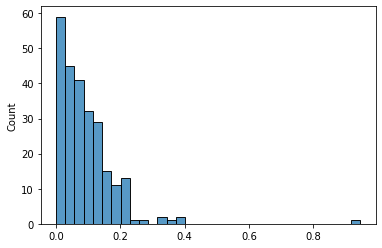

In [26]:
sns.histplot(returns_corr_series, hue=None)

In [40]:
pd.set_option("display.precision", 8)
zero_df = all_returns_df == 0

In [41]:
def plot_abs_corr_histogram(df, increment):
    corr_matrix = df.corr().abs()
    upper_mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
    corr_series = corr_matrix.where(upper_mask).stack()
    info_string = f"pairwise |corr(log returns)|, increment = {increment} minute(s)"
    sns.histplot(corr_series).set(title=info_string)

In [51]:
def compute_abs_corr_df(input_df, increments_list):
    corr_series_list = []
    for increment in increments_list:
        df = input_df.groupby(input_df.index // increment).sum()
        corr_matrix = df.corr().abs()
        upper_mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
        corr_series = corr_matrix.where(upper_mask).stack()
        corr_series.rename(increment, inplace=True)
#         info_string = f"pairwise |corr(log returns)|, increment = {increment} minute(s)"
        corr_series_list.append(corr_series)
    return pd.concat(corr_series_list, axis=1)

In [33]:
increment = 5 # must divide
all_returns_df_5 = all_returns_df.groupby(all_returns_df.index // increment).sum()

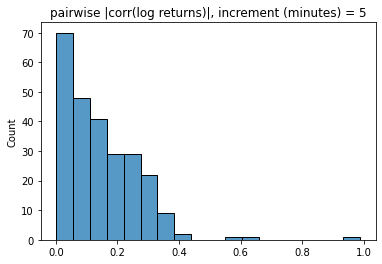

In [42]:
plot_abs_corr_histogram(all_returns_df_5, 5)

In [54]:
import matplotlib.pyplot as plt

In [62]:
df.mean()

1       0.090507
5       0.146387
20      0.179143
60      0.212066
120     0.231754
240     0.246001
720     0.286185
1400    0.343493
dtype: float64

array([[<AxesSubplot:title={'center':'pairwise |corr(log returns)|, increment = 1 minute(s)'}, ylabel='Frequency'>,
        <AxesSubplot:title={'center':'pairwise |corr(log returns)|, increment = 5 minute(s)'}, ylabel='Frequency'>],
       [<AxesSubplot:title={'center':'pairwise |corr(log returns)|, increment = 20 minute(s)'}, ylabel='Frequency'>,
        <AxesSubplot:title={'center':'pairwise |corr(log returns)|, increment = 60 minute(s)'}, ylabel='Frequency'>],
       [<AxesSubplot:title={'center':'pairwise |corr(log returns)|, increment = 120 minute(s)'}, ylabel='Frequency'>,
        <AxesSubplot:title={'center':'pairwise |corr(log returns)|, increment = 240 minute(s)'}, ylabel='Frequency'>],
       [<AxesSubplot:title={'center':'pairwise |corr(log returns)|, increment = 720 minute(s)'}, ylabel='Frequency'>,
        <AxesSubplot:title={'center':'pairwise |corr(log returns)|, increment = 1400 minute(s)'}, ylabel='Frequency'>]],
      dtype=object)

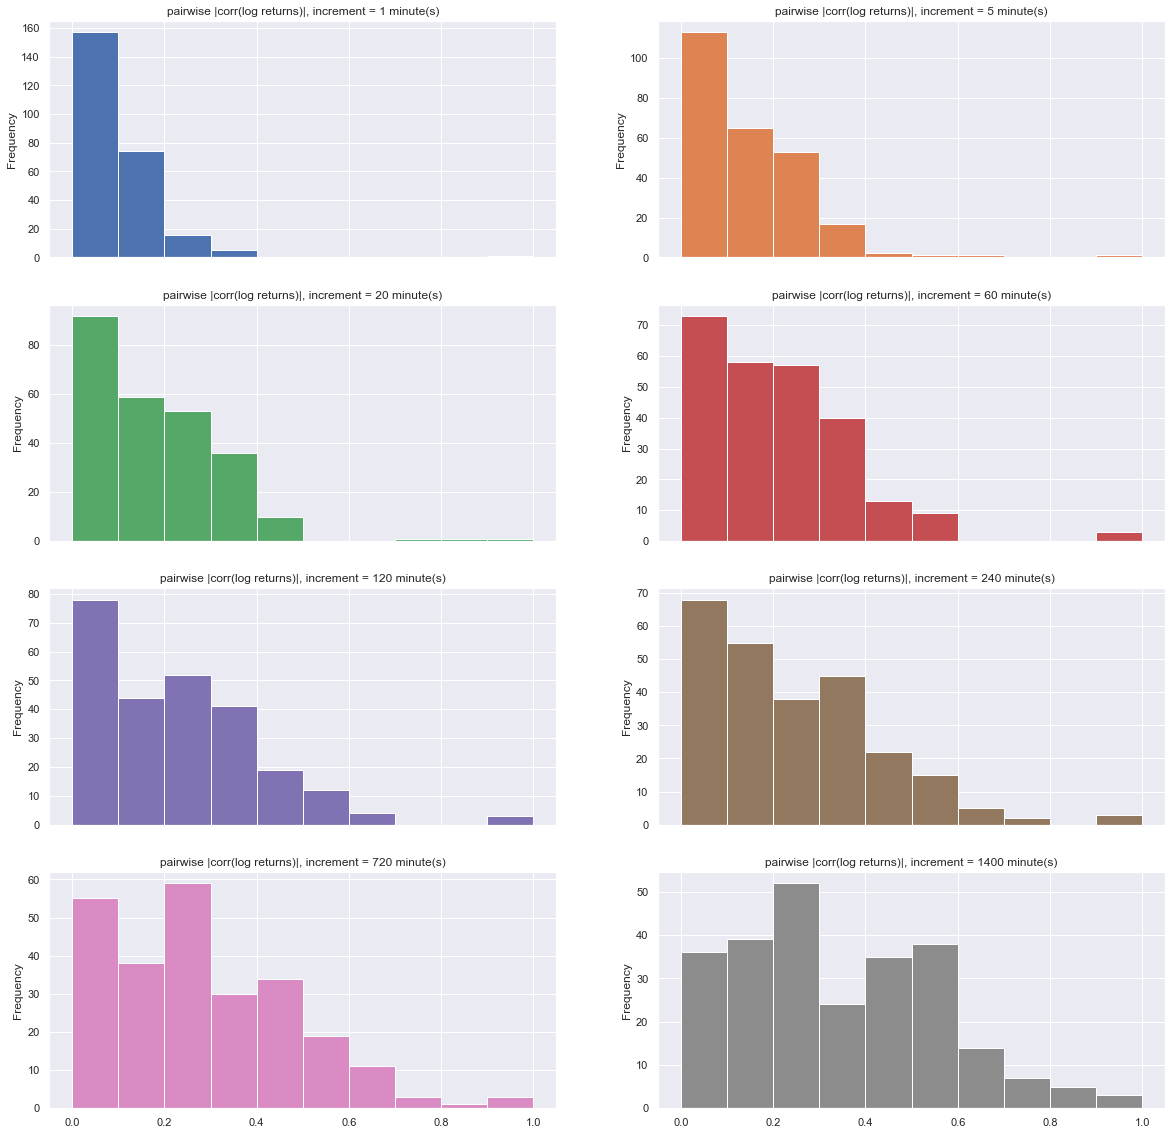

In [61]:
increments_list = [1, 5, 20, 60, 120, 240, 720, 1400,]
sns.set_context('paper')
sns.set(rc={'figure.figsize':(20,20)}) 

df = compute_abs_corr_df(all_returns_df, increments_list)

info_string_list = [f"pairwise |corr(log returns)|, increment = {increment} minute(s)" for increment in increments_list]

df.plot.hist(subplots=True, legend=False, layout=(4,2), title=info_string_list)

# g = sns.FacetGrid(df)
# g.map_dataframe(sns.histplot, col=)
# for increment in increments_list:
#     all_returns_df_summed = all_returns_df.groupby(all_returns_df.index // increment).sum()
#     plot_abs_corr_histogram(all_returns_df_summed, increment)

In [64]:
df.mean()

1       0.090507
5       0.146387
20      0.179143
60      0.212066
120     0.231754
240     0.246001
720     0.286185
1400    0.343493
dtype: float64

In [45]:
zero_df.sum() / 216

bnbbtc     24.95370370
adabtc     38.28240741
ethbtc      8.02777778
batbtc     66.21759259
btcusdc     1.06944444
btcusdt     3.85648148
neobtc     85.27314815
btctusd    84.06944444
etcbtc     61.27777778
ltcbtc     35.79629630
xrpbtc     36.59722222
trxbtc     91.73148148
eosbtc     65.35648148
xmrbtc      8.62500000
zecbtc     28.19444444
qtumbtc    75.82870370
dcrbtc     53.03703704
xlmbtc     80.44907407
iotabtc    58.75925926
manabtc    16.12962963
dashbtc    49.43518519
zrxbtc     46.75925926
scbtc      99.31481481
repbtc     79.79629630
dtype: float64

<AxesSubplot:ylabel='Count'>

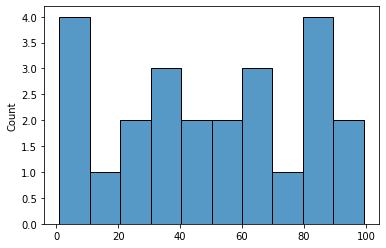

In [65]:
sns.histplot(zero_df.sum() / 216, bins=10)

In [68]:
((zero_df.sum() / 216) < 70).value_counts()

True     17
False     7
dtype: int64

In [46]:
import seaborn as sns

In [53]:
nonzero_df = ~zero_df

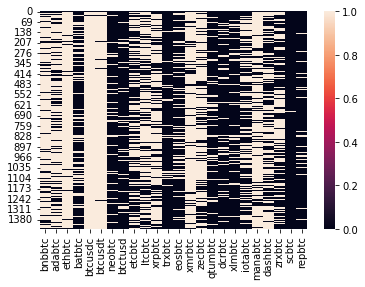

In [63]:
ax = sns.heatmap(nonzero_df.loc[:1440])

<AxesSubplot:>

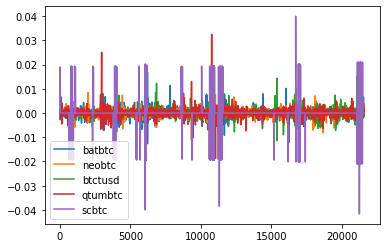

In [37]:
all_returns_df[['batbtc', 'neobtc', 'btctusd', 'qtumbtc', 'scbtc']].plot()

In [1]:
all_returns_df

NameError: name 'all_returns_df' is not defined